# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

Text(0.5, 0, 'Charges')

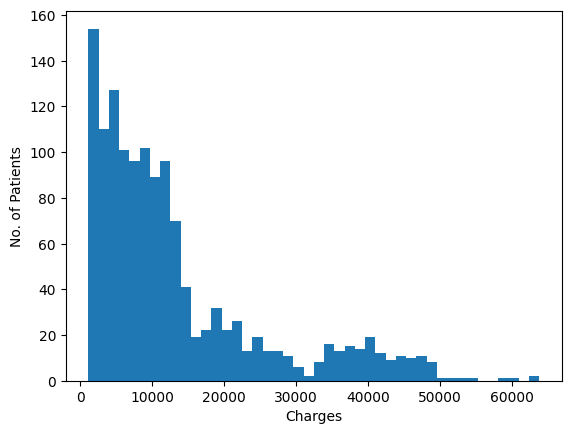

In [5]:
plt.hist(medical.charges, bins=int(len(medical)/30))
plt.ylabel('No. of Patients')
plt.xlabel('Charges')

In [227]:
mean_charges = medical.charges.mean(); print(f"Mean of Charges: \t {mean_charges:,.2f}") 

# Since observations were randomly sampled from hospital, will use Bessel's correction (ddof=1):
stdev_charges = medical.charges.std(ddof=1); print(f"Stdev of Charges: \t {stdev_charges:,.2f}")

Mean of Charges: 	 13,270.42
Stdev of Charges: 	 12,110.01


<div style="font-size:16px; font-family:Courier New;">
    
As the distribution is skewed, the median may be a better measure of central tendency than the mean for this specific sample.  However, this is irrelevant in the context of a sampling distribution as such a distribution will tend towards normality and thus more symmetry with repeated samples due to the Central Limit Theorem. 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

<div style="font-size:16px; font-family:Courier New;">

Given that:

* the data is assumed to be a randomly sampled
* the sample size is $\ge 30$ ($\text{n} = 1338$)

By the Central Limit Theorem, we can perform statistical testing to make educated guesses about the true population average charge, even if the underlying shape and parameters are unknown, and even if the underlying shape is not Gaussian.

As the population standard deviation $\sigma$ is unknown, a t-test would be appropriate.  

As we are concerned about a single group (medical charges), this would be a **one-sample t-test**.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

<div style="font-size:16px; font-family:Courier New;">
    
<u>one- vs. two-sided</u>

Since the administrator is concerned about the population average falling below 12,000, not above, a **one-sided** interval would be most appropriate.  More appropriately, this will be the lower confidence bound.

<div style="font-size:16px; font-family:Courier New;">
<u>Critical Value ($t^*$)</u>

<div style="font-size:16px; font-family:Courier New;">
    
To get $t^*$ for a lower bound with a confidence level of $\gamma=0.95$, we essentially want to find the value along the t-distribution for which everything below it constitutes 95% of the probability.  In other words, the area under the curve for the interval $(-\infty,t^*]$ should be 0.95 in total. 

Using the PPF, this is

$$t^* = PPF(\gamma,\text{df})$$
$$ = PPF(0.95, 1338-1) $$

which evaluates to:

In [85]:
# Critical t-value for one-sided interval, lower bound:
n=len(medical.charges)
t_star = t.ppf(0.95,df=n-1)
t_star.round(2)

1.65

<div style="font-size:16px; font-family:Courier New;">

<u>Margin of Error</u>

In [86]:
# Margin of Error for 95% CI using t*: 
n = len(medical.charges)
moe95t = t_star * (stdev_charges / np.sqrt(n))
moe95t.round(2)

544.94

<div style="font-size:16px; font-family:Courier New;">

<u>95% Confidence Interval, lower bound</u>

Since we are only concerned about the true mean being below 12,000, we only need the lower bound:

$$ \text{l.b.} = \bar{x} - t^* \left(\frac{s}{\sqrt{n}}\right) $$

while the relationship with the upper bound, $\bar{x} + t^* \left(\frac{s}{\sqrt{n}}\right) $, is irrelevant.

If generating $\text{l.b.}$ repeated times, then it should be found that $\mu > \text{l.b.}$ 95% of the time, and the administrator should be concerned if $12,000 > \text{l.b.}$, suggesting a not insignificant chance that $\mu \le 12,000$.

In [91]:
# 95% Confidence Bound using t*:
cb95t = mean_charges - moe95t
cb95t.round(2)

12725.49

In [90]:
12000 > cb95t 

False

<div style="font-size:16px; font-family:Courier New;">
 
Given that the lower bound of the confidence interval is well above $12,000$, this is fairly reassuring - i.e., the administrator need not be concerned.  With repeated samples taken from the population, this interval would drop below 12,725.49 only ~5% of the time and would drop below 12,000 less than 5% of the time.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
<div style="font-size:16px; font-family:Courier New;">

#### <u>Hypotheses</u>



* $H_0: \mu_{I} = \mu_{U}$
* $H_1: \mu_{I} \ne \mu_{U}$ (--> two-sided test)

where 
* $\mu_{I}$ is the population mean of charges for insured individuals
* $\mu_{U}$ is the population mean of charges for those without insurance (uninsured)

<div style="font-size:16px; font-family:Courier New;"

#### <u>Assumption Regarding Variances</u>

The underlying assumption for the pooled two-sample t-test is that the true population variances are equal, even if the sample variances are different. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

<div style="font-size:16px; font-family:Courier New;">
    
### <u>Pooled t-test</u>

In [96]:
insured = medical[medical.insuranceclaim == True]
uninsured = medical[medical.insuranceclaim == False]

<div style="font-size:16px; font-family:Courier New;">

#### Manual Calculation

In [203]:
# Calculate sample n, mean, and var for insured
n_insu = len(insured)
mean_insu = np.mean(insured.charges)
var_insu = np.var(insured.charges,ddof=1)
print(n_insu,mean_insu.round(2),round(var_insu,2))

783 16423.93 197288105.15


In [202]:
# Calculate sample n, mean, and var for uninsured
n_unin = len(uninsured)
mean_unin = np.mean(uninsured.charges)
var_unin = np.var(uninsured.charges,ddof=1)
print(n_unin,mean_unin.round(2),round(var_unin,2))

555 8821.42 41557492.82


In [204]:
# Pooled degrees of freedom (denominator)
df_pool = n_insu + n_unin - 2
print(df_pool)

# Pooled standard deviation
s_pool = np.sqrt( ((n_insu-1)*var_insu + (n_unin-1)*var_unin) / df_pool )
print(s_pool.round(2))

1336
11520.03


In [214]:
# t-statistic
t_stat_manual = (mean_insu - mean_unin) / ( s_pool * np.sqrt( (1/n_insu)+ (1/n_unin) ) )
t_stat_manual.round(4)

11.8933

In [215]:
# p-value (two-sided)
p_value = 2 * (1 - t.cdf(t_stat_manual,df_pool))
print(p_value)

0.0


<div style="font-size:16px; font-family:Courier New;">

#### Using ``scipy.stats``

In [211]:
from scipy.stats import ttest_ind

help(ttest_ind)

Help on function ttest_ind in module scipy.stats._stats_py:

ttest_ind(a, b, *, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0, method=None, keepdims=False)
    Calculate the T-test for the means of *two independent* samples of scores.

    This is a test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.

    .. deprecated:: 1.17.0
        Use of argument(s) ``{'keepdims', 'method', 'equal_var', 'nan_policy', 'axis', 'trim', 'alternative'}`` by position is deprecated; beginning in
        SciPy 1.17.0, these will be keyword-only. Argument(s) ``{'permutations', 'random_state'}`` are deprecated, whether passed by position or keyword; they will be removed in SciPy 1.17.0. Use ``method`` to perform a permutation test.

    Parameters
    ----------
    a, b : array_like
        The arrays must h

In [220]:
t_statistic,pvalue = ttest_ind(insured.charges,uninsured.charges,equal_var=True)
print(t_statistic.round(4))
print(pvalue.round(2))

11.8933
0.0


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

<div style="font-size:16px; font-family:Courier New;">
    
Looking at the section on [hypothesis tests](https://docs.scipy.org/doc/scipy/reference/stats.html#hypotests), there doesn't seem to be a function that does the exact equivalent to `scipy.stats.ttest_ind()`, performing a two-sampled test for independent samples but with the z-distribution. However, it is possible to calculate a z-score for a single sample using `scipy.stats.mstats.zscore()`, which could then be used in a one-sample z-test.



## 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test